In [1]:
%matplotlib inline

import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

DATA_ROOT = os.path.join(os.getcwd(), os.pardir, 'data', 'raw')

In [2]:
!tree {DATA_ROOT}/registration
!tree -L 1 {DATA_ROOT}/planet/wards

/Users/bull/farmdrive/notebooks/../data/raw/registration
├── locations.csv
└── surveyresultsraw.csv

0 directories, 2 files
/Users/bull/farmdrive/notebooks/../data/raw/planet/wards
├── BULLA-MPYA.png
├── CHURO-AMAYA_fall
├── EMINING_fall
├── EWALEL-CHAPCHAP_fall_analytic.tif
├── EWALEL-CHAPCHAP_fall_analytic.tif.aux.xml
├── ILCHAMUS_fall
├── KISANANA_fall
├── KISII-CENTRAL_fall
├── KOLOWA_fall
├── LEMBUS-PERKERRA_fall
├── LOIYAMOROCK_fall
├── MARIGAT_fall
├── MOGOTIO_fall
├── MUKUTANI_fall
├── MUMBERES-MAJI-MAZURI_fall
├── RAVINE_fall
├── RIBKWO_fall
├── all_ward_data.csv
└── build_features.py

14 directories, 5 files


In [3]:
survey = pd.read_csv(os.path.join(DATA_ROOT, 'registration', 'surveyresultsraw.csv'), index_col=0)
locations = pd.read_csv(os.path.join(DATA_ROOT, 'registration', 'locations.csv'), index_col=0)
ward_data = pd.read_csv(os.path.join(DATA_ROOT, 'planet', 'wards', 'all_ward_data.csv'), index_col=0)

In [4]:
survey.head()

,id,stage,reply,complete,fmr_id
1,10067,"100,100,100,1,2,3,4,5,6,7,8,9,10,11","[""100.100.100.1 1"",""100.100.100.2 150000"",""100...",1,1409
2,10069,"100,100,100,1,2,3,4,5,6,7,8","[""100.100.100.1 2"",""100.100.100.2 95000"",""100....",0,1457
3,10074,"100,100,100,1,2","[""100.100.100.1 2""]",0,1469
4,10078,"100,100,100,1","[""100.100.100.1 3""]",1,2307
5,10080,"100,100,100,1,2,3,4,5,6,7,8,9,10,11","[""100.100.100.1 1"",""100.100.100.2 50000"",""100....",1,1523


In [5]:
def _question_list_to_series(qs):
    records = {k: '' for k in range(1, 12)}
    
    for q in qs:
        qid, answer = q.split(" ", 1)
        q_number = int(qid.split('.')[-1])
        records[q_number] = answer

    return pd.Series(records)

survey_answers = (survey.reply.apply(eval) #lolol
                              .apply(_question_list_to_series))

survey_answers.index = survey.fmr_id
survey_answers.head()

,1,2,3,4,5,6,7,8,9,10,11
fmr_id,,,,,,,,,,,
1409,1,150000,150000,Snow Peas,1667,Githunguri Primary 30,Tulaga 45,Kanamba 40,2,2016,No
1457,2,95000,95000,viazi,52bags,KANDUTURA PRIMARY 15,KADUTURA PRIMARY 15,,,,
1469,2,,,,,,,,,,
2307,3,,,,,,,,,,
1523,1,50000,50000,kales,50,"Ngecha primary, 15","Gichuru high school, 10","Muthurwa, 30",3,2015,YES


In [6]:
locations.head()

,School,Market,Given Ward,lat,longit,ward_fuzzy_match,confidence_fuzzy_match,money_prevyear,moneyfromfarm_prevyear,maincrop_prevyear
fmr_id,,,,,,,,,,
2344,"Cheplelachbei Primary, 20","Himaki, 30",NaN,-2.863370,39.6755,ADU,Low,0,0,NaN
2345,"Gatondo primary,10","Karatina ,45",Iria-ini ward Nyeri county,-0.541345,36.8319,IRIA-INI,Low,0,0,NaN
250,"MUKEU PRIMARY, 20","KIMENDE,40",KIJABE,-0.957660,36.6454,KIJABE,Low,0,0,NaN
1457,"Kandutura Primary,35","Rongai,30",Visho,-0.157628,35.8707,VISOI,Low,0,0,NaN
39,"Mukeu Primary, 15","Kirenga, 20",Kirenga,-1.784990,41.3312,KIUNGA,Low,0,0,NaN


In [7]:
ward_data

,npcri_mean,npcri_pct_likely,npcri_std,re_ndvi_mean,re_ndvi_pct_likely,re_ndvi_std,re_ndwi_mean,re_ndwi_pct_likely,re_ndwi_std
BULLA-MPYA,0.194980,1.619159e-01,0.058722,0.000048,0.000200,0.023368,-0.126239,0.000001,0.053865
LEMBUS,-0.004443,1.499206e-03,0.096610,0.035624,0.003183,0.049886,0.000784,0.016708,0.069497
KISII-CENTRAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BOGEKA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HURUMA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MOCHONGOI,-0.126829,2.559128e-04,0.107726,0.137331,0.164334,0.118816,0.011141,0.019217,0.066908
KOMAROCK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BUNYALA-NORTH,0.956446,9.675532e-01,0.255154,0.686976,0.706601,0.504976,-0.489366,0.095437,0.656065
NGARARIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MUTU-INI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
from fuzzywuzzy.process import extractOne

In [23]:
import re
re.split?

In [51]:
import re

WARD_CHOICES = ward_data.index.values.tolist()

def _get_matching_ward(x):
    best_score = 0
    best_match = ""
    matched_token = ""
    
    # add descriptor if we see it in the original
    addendum = ""
    
    addendors = ["north", "south", "central", "east", "west"]
    skips = ["farm", "ward", "engineer"]
    special_cases = {"perkerra": 'LEMBUS-PERKERRA'}
    
    for a in addendors:
        if a in x.lower():
            addendum = a + "-"
            
    for sc, ward in special_cases.items():
        if sc in x.lower():
            return 100, ward, x
    
    for token in re.split("[ ,.]", x):
        if token.lower() in addendors or token.lower() in skips:
            continue
        
        match, score = extractOne(addendum + token, WARD_CHOICES)
        
        if score > best_score:
            best_match = match
            best_score = score
            matched_token = token
            
    return best_score, best_match, matched_token

data_dict = {
    'ward_orig': locations["Given Ward"].dropna().head(1000)
}

scores, matches, tokens = zip(*locations["Given Ward"].dropna().head(1000).apply(_get_matching_ward))

data_dict['ward_score'] = scores
data_dict['ward_match'] = matches
data_dict['ward_token'] = tokens

ward_matching = pd.DataFrame(data_dict)
ward_matching.head()

,ward_match,ward_orig,ward_score,ward_token
fmr_id,,,,
2345,IRIA-INI,Iria-ini ward Nyeri county,100,Iria-ini
250,KIAMBERE,KIJABE,71,KIJABE
1457,VISOI,Visho,80,Visho
39,KITENGELA,Kirenga,75,Kirenga
2292,MATAYOS-SOUTH,Matayos ward,90,Matayos


In [98]:
final_df = (locations.join(survey_answers, how='outer')
                     .join(ward_matching)
                     .join(ward_data, on='ward_match'))

final_df = final_df[final_df.ward_score > 80]

final_df = final_df[['moneyfromfarm_prevyear', 3] + ward_data.columns.tolist()]

final_df[3] = pd.to_numeric(final_df[3], errors='coerce')

for c in [3, 'moneyfromfarm_prevyear']:
    final_df[c].replace('', np.nan, inplace=True)
    final_df[c].replace(np.nan, 0, inplace=True)

final_df['money_farm_previous_year'] = np.where((final_df[3] == 0) | (final_df['moneyfromfarm_prevyear'] == 0),
                                                 final_df[3] + final_df['moneyfromfarm_prevyear'],
                                                 final_df[[3, 'moneyfromfarm_prevyear']].mean(axis=1))

In [99]:
final_df = final_df[final_df.money_farm_previous_year > 0]
final_df.drop([3, 'moneyfromfarm_prevyear'], axis=1, inplace=True)
final_df.dropna(inplace=True)

final_df

,npcri_mean,npcri_pct_likely,npcri_std,re_ndvi_mean,re_ndvi_pct_likely,re_ndvi_std,re_ndwi_mean,re_ndwi_pct_likely,re_ndwi_std,money_farm_previous_year
fmr_id,,,,,,,,,,
6,-0.200695,0.000000e+00,0.101218,0.281704,0.708215,0.075671,-0.126504,0.000000,0.037333,0.125
64,0.625000,8.125000e-01,0.780625,0.999179,0.999385,0.035111,-0.875000,0.062500,0.484123,20000.000
147,-0.059508,5.239418e-05,0.096151,0.157660,0.156806,0.097804,-0.005545,0.000076,0.036703,150000.000
194,-0.059508,5.239418e-05,0.096151,0.157660,0.156806,0.097804,-0.005545,0.000076,0.036703,14000.000
207,-0.178401,1.038733e-03,0.131340,0.093832,0.071810,0.103221,0.120257,0.120045,0.103701,120000.000
211,-0.069967,3.252360e-03,0.107959,0.051060,0.005775,0.060804,0.066070,0.025717,0.096419,75000.000
306,-0.176313,7.781083e-05,0.102185,0.279814,0.687335,0.077491,-0.125009,0.000000,0.032926,90000.000
319,-0.638765,5.128205e-02,0.568740,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000
397,-0.096702,1.024890e-03,0.100062,0.014615,0.000003,0.056296,0.089411,0.020668,0.083833,110000.000


(0, 50000)

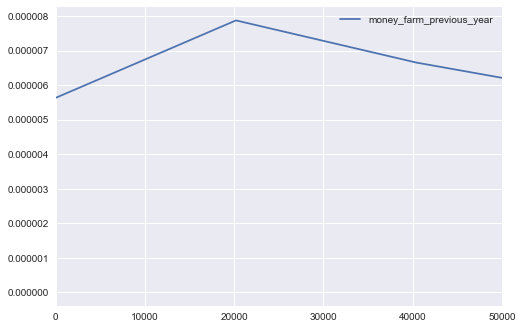

In [110]:
sns.kdeplot(final_df.money_farm_previous_year, bw=0.05)
plt.gca().set_xlim([0, 50000])

In [ ]:
pd.Series.quantile()

                               OLS Regression Results                               
Dep. Variable:     money_farm_previous_year   R-squared:                       0.431
Model:                                  OLS   Adj. R-squared:                  0.334
Method:                       Least Squares   F-statistic:                     4.457
Date:                      Thu, 25 May 2017   Prob (F-statistic):           0.000223
Time:                              15:19:02   Log-Likelihood:                -787.55
No. Observations:                        62   AIC:                             1593.
Df Residuals:                            53   BIC:                             1612.
Df Model:                                 9                                         
Covariance Type:                  nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

/Users/bull/anaconda3/envs/farmdrive/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


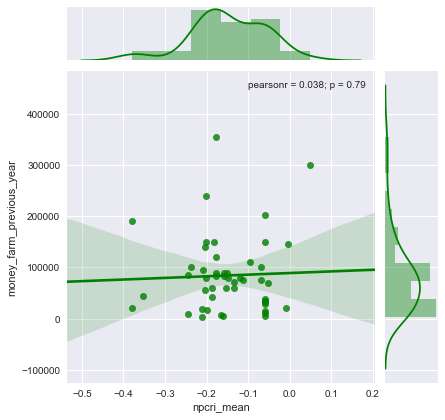

                               OLS Regression Results                               
Dep. Variable:     money_farm_previous_year   R-squared:                       0.047
Model:                                  OLS   Adj. R-squared:                  0.031
Method:                       Least Squares   F-statistic:                     2.988
Date:                      Thu, 25 May 2017   Prob (F-statistic):             0.0889
Time:                              15:19:03   Log-Likelihood:                -803.54
No. Observations:                        62   AIC:                             1609.
Df Residuals:                            61   BIC:                             1611.
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

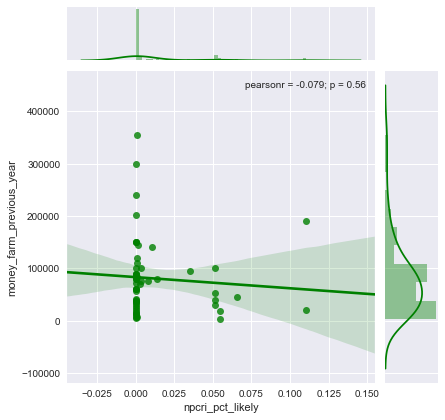

                               OLS Regression Results                               
Dep. Variable:     money_farm_previous_year   R-squared:                       0.199
Model:                                  OLS   Adj. R-squared:                  0.186
Method:                       Least Squares   F-statistic:                     15.14
Date:                      Thu, 25 May 2017   Prob (F-statistic):           0.000249
Time:                              15:19:04   Log-Likelihood:                -798.15
No. Observations:                        62   AIC:                             1598.
Df Residuals:                            61   BIC:                             1600.
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

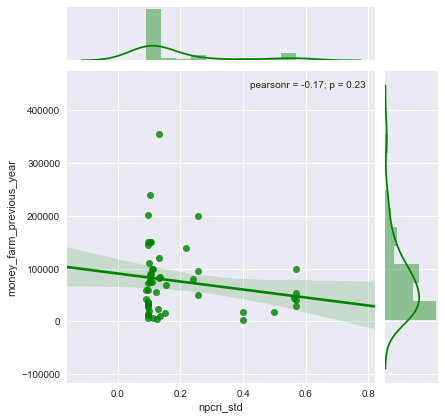

                               OLS Regression Results                               
Dep. Variable:     money_farm_previous_year   R-squared:                       0.154
Model:                                  OLS   Adj. R-squared:                  0.141
Method:                       Least Squares   F-statistic:                     11.14
Date:                      Thu, 25 May 2017   Prob (F-statistic):            0.00145
Time:                              15:19:04   Log-Likelihood:                -799.82
No. Observations:                        62   AIC:                             1602.
Df Residuals:                            61   BIC:                             1604.
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

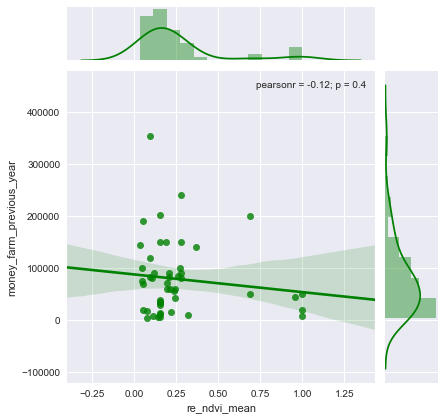

                               OLS Regression Results                               
Dep. Variable:     money_farm_previous_year   R-squared:                       0.235
Model:                                  OLS   Adj. R-squared:                  0.222
Method:                       Least Squares   F-statistic:                     18.71
Date:                      Thu, 25 May 2017   Prob (F-statistic):           5.73e-05
Time:                              15:19:05   Log-Likelihood:                -796.73
No. Observations:                        62   AIC:                             1595.
Df Residuals:                            61   BIC:                             1598.
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

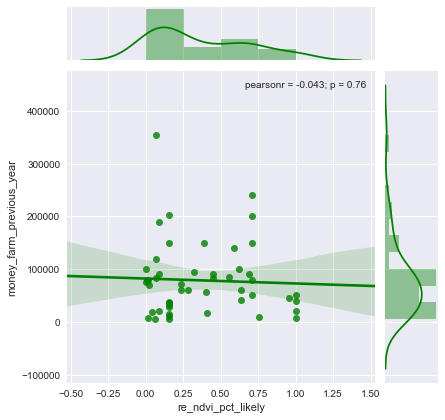

                               OLS Regression Results                               
Dep. Variable:     money_farm_previous_year   R-squared:                       0.315
Model:                                  OLS   Adj. R-squared:                  0.303
Method:                       Least Squares   F-statistic:                     28.01
Date:                      Thu, 25 May 2017   Prob (F-statistic):           1.73e-06
Time:                              15:19:06   Log-Likelihood:                -793.31
No. Observations:                        62   AIC:                             1589.
Df Residuals:                            61   BIC:                             1591.
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

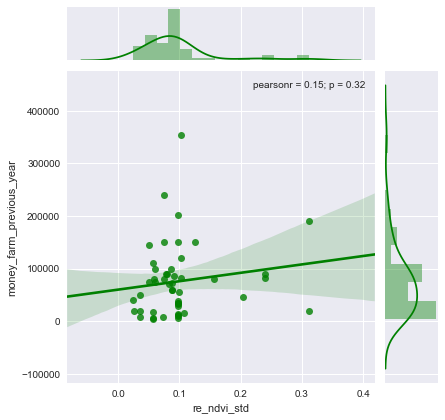

                               OLS Regression Results                               
Dep. Variable:     money_farm_previous_year   R-squared:                       0.001
Model:                                  OLS   Adj. R-squared:                 -0.015
Method:                       Least Squares   F-statistic:                   0.06747
Date:                      Thu, 25 May 2017   Prob (F-statistic):              0.796
Time:                              15:19:06   Log-Likelihood:                -804.99
No. Observations:                        62   AIC:                             1612.
Df Residuals:                            61   BIC:                             1614.
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

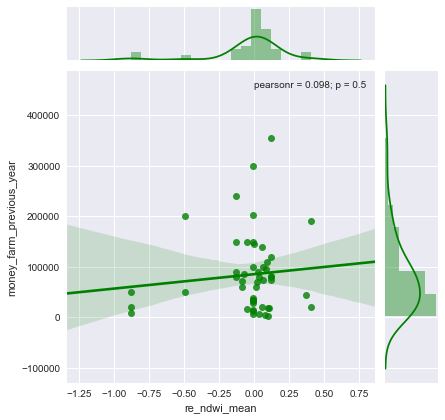

                               OLS Regression Results                               
Dep. Variable:     money_farm_previous_year   R-squared:                       0.059
Model:                                  OLS   Adj. R-squared:                  0.044
Method:                       Least Squares   F-statistic:                     3.846
Date:                      Thu, 25 May 2017   Prob (F-statistic):             0.0544
Time:                              15:19:07   Log-Likelihood:                -803.13
No. Observations:                        62   AIC:                             1608.
Df Residuals:                            61   BIC:                             1610.
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

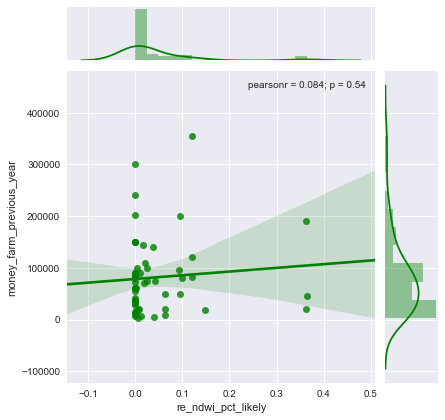

                               OLS Regression Results                               
Dep. Variable:     money_farm_previous_year   R-squared:                       0.189
Model:                                  OLS   Adj. R-squared:                  0.176
Method:                       Least Squares   F-statistic:                     14.20
Date:                      Thu, 25 May 2017   Prob (F-statistic):           0.000373
Time:                              15:19:07   Log-Likelihood:                -798.53
No. Observations:                        62   AIC:                             1599.
Df Residuals:                            61   BIC:                             1601.
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

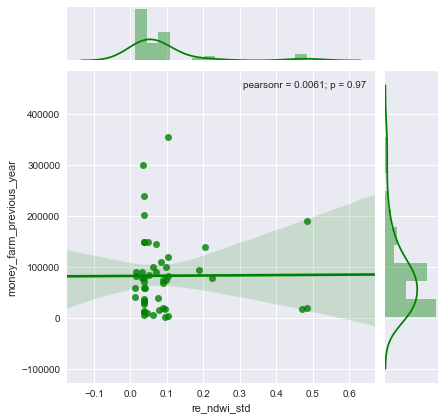

In [125]:
import statsmodels.api as sm
import seaborn as sns

# reasonable_min = 20000
# reasonable_max = 250000

def interval_n_pct(series, pct_data=0.9):
    diff = (1. - pct_data) / 2.
    return (series.quantile(diff), series.quantile(1 - diff))

# reasonable_min = final_df.money_farm_previous_year.mean() - final_df.money_farm_previous_year.std()
# reasonable_max = final_df.money_farm_previous_year.mean() + final_df.money_farm_previous_year.std()

reasonable_min, reasonable_max = interval_n_pct(final_df.money_farm_previous_year, pct_data=0.9)

to_plot = final_df[(final_df.money_farm_previous_year >= reasonable_min) & 
                   (final_df.money_farm_previous_year <= reasonable_max)]

exogenous = [c for c in final_df.columns if c != 'money_farm_previous_year']

est = sm.OLS(to_plot.money_farm_previous_year, to_plot[exogenous])
res = est.fit()
print(res.summary())

for c in exogenous:
    mn, mx = interval_n_pct(final_df[c], pct_data=0.80)

    est = sm.OLS(to_plot.money_farm_previous_year, to_plot[c])
    res = est.fit()
    print(res.summary())

    sns.jointplot(c,
                'money_farm_previous_year',
                data=to_plot[(final_df[c] >= mn) & (final_df[c] <= mx)],
                kind='reg', color='g')
    plt.show()